<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-librairies-nécessaires" data-toc-modified-id="Les-librairies-nécessaires-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les librairies nécessaires</a></span></li><li><span><a href="#La-connexion-à-la-base-de-données-PostgreSQL" data-toc-modified-id="La-connexion-à-la-base-de-données-PostgreSQL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La connexion à la base de données PostgreSQL</a></span></li><li><span><a href="#Création-de-la-table-COMMANDES01" data-toc-modified-id="Création-de-la-table-COMMANDES01-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Création de la table COMMANDES01</a></span><ul class="toc-item"><li><span><a href="#Clé-primaire-pour-la-table-COMMANDES01" data-toc-modified-id="Clé-primaire-pour-la-table-COMMANDES01-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clé primaire pour la table COMMANDES01</a></span></li><li><span><a href="#Clé-étrangère-référencent-la-colonne-NO_EMPLOYE-de-la-table-EMPLOYES" data-toc-modified-id="Clé-étrangère-référencent-la-colonne-NO_EMPLOYE-de-la-table-EMPLOYES-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clé étrangère référencent la colonne NO_EMPLOYE de la table EMPLOYES</a></span></li></ul></li></ul></div>

# Les librairies nécessaires

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)

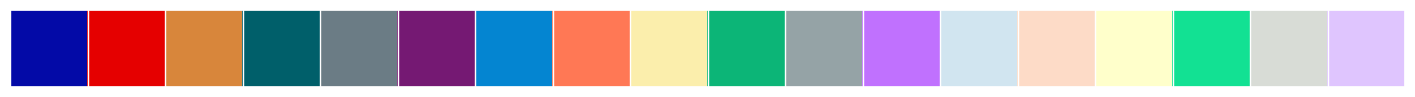

In [2]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [3]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

# Lecture du fichier de données

In [7]:
donnees=pd.read_parquet('../donnees/stagiaire/stagav_sql02')
donnees.trimestre = donnees.trimestre.astype('int8')
donnees.jour = donnees.jour.astype('int8')
donnees.head()

,pays_v,region_v,pays_c,province_c,produit,categorie,pays_f,ville_f,annee,trimestre,mois,jour,port,ca,remise,quantite
0,États-Unis,Amérique du Nord,Japon,Aichi,Jack's New England Clam Chowder,Poissons et fruits de mer,États-Unis,Boston,2019,4,10,7,110.8,21075.36,12.28,332
1,États-Unis,Amérique du Nord,Japon,Aichi,Pineapple,Conserves,France,Montceau,2019,4,10,7,110.8,35834.40,22.56,378
2,France,Europe de l'Ouest,Australie,Queensland,Tourtière,Viandes,Canada,Montréal,2019,4,11,4,74.9,1740.48,5.20,37
3,Danemark,Europe du Nord,Royaume-Uni,England - Greater London,Original Frankfurter grüne Soße,Condiments,Allemagne,Frankfurt a.M.,2019,4,11,4,70.2,4527.00,8.98,75
4,France,Europe de l'Ouest,Australie,New South Wales,Wimmers gute Semmelknödel,Pâtes et céréales,Allemagne,Frankfurt a.M.,2019,4,11,6,125.3,14277.12,13.95,286


In [8]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396966 entries, 0 to 1396965
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   pays_v      1396966 non-null  object 
 1   region_v    1396966 non-null  object 
 2   pays_c      1396966 non-null  object 
 3   province_c  1396966 non-null  object 
 4   produit     1396966 non-null  object 
 5   categorie   1396966 non-null  object 
 6   pays_f      1396966 non-null  object 
 7   ville_f     1396966 non-null  object 
 8   annee       1396966 non-null  int64  
 9   trimestre   1396966 non-null  int8   
 10  mois        1396966 non-null  int64  
 11  jour        1396966 non-null  int8   
 12  port        1396966 non-null  float64
 13  ca          1396966 non-null  float64
 14  remise      1396966 non-null  float64
 15  quantite    1396966 non-null  int64  
dtypes: float64(3), int64(3), int8(2), object(8)
memory usage: 151.9+ MB


In [9]:
donnees.describe()

,annee,trimestre,mois,jour,port,ca,remise,quantite
count,1.396966e+06,1.396966e+06,1.396966e+06,1.396966e+06,1.396966e+06,1.396966e+06,1.396966e+06,1.396966e+06
mean,2.017901e+03,2.520187e+00,6.550792e+00,3.993429e+00,8.949210e+01,8.605072e+03,9.779386e+00,1.313852e+02
std,7.867650e-01,1.111129e+00,3.429606e+00,1.996388e+00,3.894698e+01,5.901259e+03,5.106600e+00,8.065802e+01
min,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+01,7.200000e+02,3.000000e+00,2.000000e+01
25%,2.017000e+03,2.000000e+00,4.000000e+00,2.000000e+00,6.510000e+01,4.384800e+03,6.470000e+00,7.200000e+01
50%,2.018000e+03,3.000000e+00,7.000000e+00,4.000000e+00,8.000000e+01,7.432320e+03,8.590000e+00,1.220000e+02
75%,2.019000e+03,4.000000e+00,1.000000e+01,6.000000e+00,9.500000e+01,1.134948e+04,1.142000e+01,1.710000e+02
max,2.019000e+03,4.000000e+00,1.200000e+01,7.000000e+00,7.898000e+02,9.432720e+04,1.062300e+02,1.191000e+03


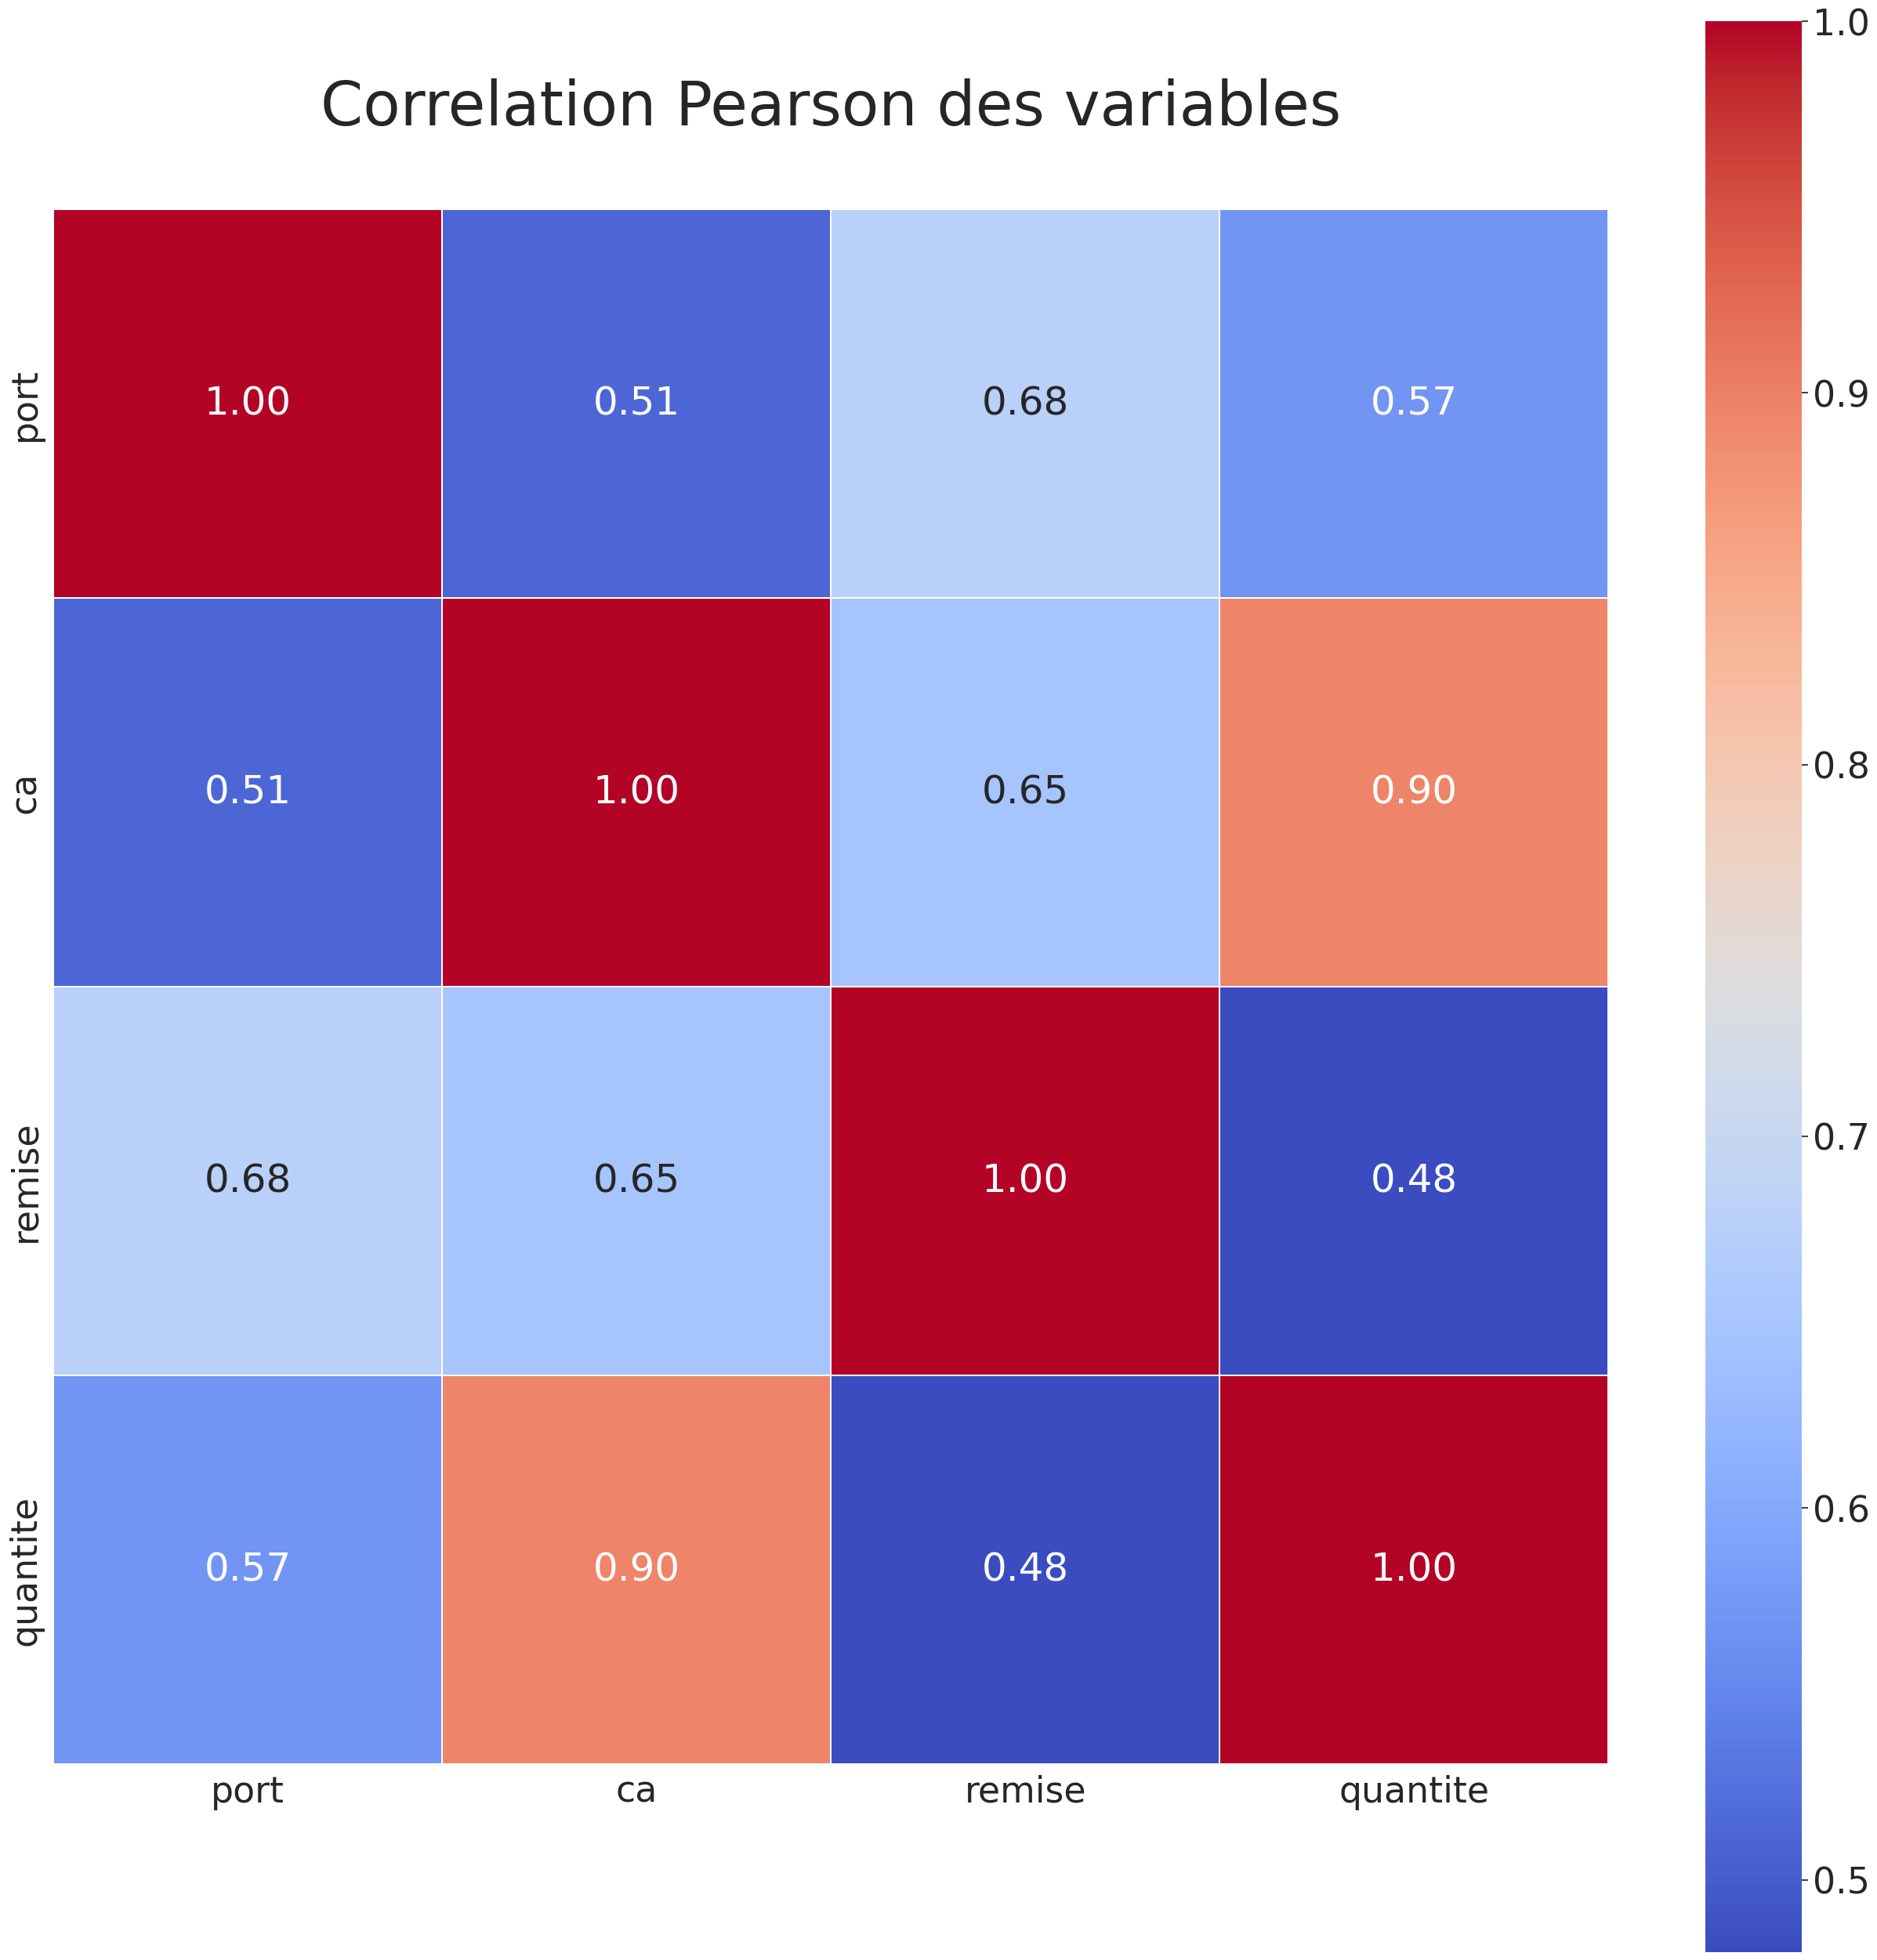

In [11]:
plt.figure(figsize=(32,32))
plt.title('Correlation Pearson des variables', y=1.05, size=56)
sns.heatmap(donnees[['port','ca','remise','quantite']].corr(),linewidths=0.3,vmax=1.0, fmt= '.2f', 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

In [10]:
donnees.columns

Index(['pays_v', 'region_v', 'pays_c', 'province_c', 'produit', 'categorie',
       'pays_f', 'ville_f', 'annee', 'trimestre', 'mois', 'jour', 'port', 'ca',
       'remise', 'quantite'],
      dtype='object')

In [44]:
d01 = donnees.pivot_table(index=['pays_c','pays_v'],
                    columns=['annee','trimestre'], 
                    values='quantite')
print(d01.isna().sum().sum())
d01

0


annee                         2017                                      \
trimestre                        1           2           3           4   
pays_c     pays_v                                                        
Allemagne  Allemagne    143.884868  136.859436  133.682614  135.791292   
           Argentine    153.401804  133.403302  135.017582  146.579869   
           Autriche     140.385135  118.648221  123.263538  116.121622   
           Belgique     112.555556  114.093851  139.777448  142.914842   
           Brésil       161.761826  139.142182  147.722029  158.896538   
...                            ...         ...         ...         ...   
États-Unis Royaume-Uni  138.647764  124.845771  128.099448  138.227162   
           Suisse       131.928715  144.453462  149.049359  148.703329   
           Suède        110.196532  127.014778  117.387097  109.622535   
           Venezuela    104.432624  142.381650  128.069264  123.350467   
           États-Unis   128.894220  131.609054  127.589209  128.233113   

annee                         2018                                      \
trimestre                        1           2           3           4   
pays_c     pays_v                                                        
Allemagne  Allemagne    133.602526  154.178677  119.668534  149.305652   
           Argentine    132.187588  116.662393  133.483483  131.235890   
           Autriche     138.626728  108.931250  124.817844  115.714903   
           Belgique     126.461538  119.181598  143.768519  129.639810   
           Brésil       155.600495  158.051664  154.888848  147.527094   
...                            ...         ...         ...         ...   
États-Unis Royaume-Uni  122.500939  131.857143  132.370819  126.189229   
           Suisse       145.034188  131.861407  126.313945  137.956638   
           Suède        114.673016  127.963687  165.025000  131.181102   
           Venezuela    126.909730  117.624343  135.600877  136.886440   
           États-Unis   129.201660  131.352760  131.213256  125.412268   

annee                         2019                                      
trimestre                        1           2           3           4  
pays_c     pays_v                                                       
Allemagne  Allemagne    134.891636  137.496104  138.565789  118.990741  
           Argentine    128.150342  111.760839  143.107246  126.170015  
           Autriche     117.244526  110.092308  126.416058  117.336918  
           Belgique     122.592784  109.973684  118.384615  113.042254  
           Brésil       134.432203  147.098689  144.982134  153.412060  
...                            ...         ...         ...         ...  
États-Unis Royaume-Uni  127.617164  139.732749  135.805300  126.317105  
           Suisse       107.372549  154.965636  133.093093  141.461084  
           Suède        105.539877  148.378788  113.052632  124.200608  
           Venezuela    136.661202  138.991261  130.768608  132.775194  
           États-Unis   125.459791  130.018667  127.167998  120.532452  

[142 rows x 12 columns]

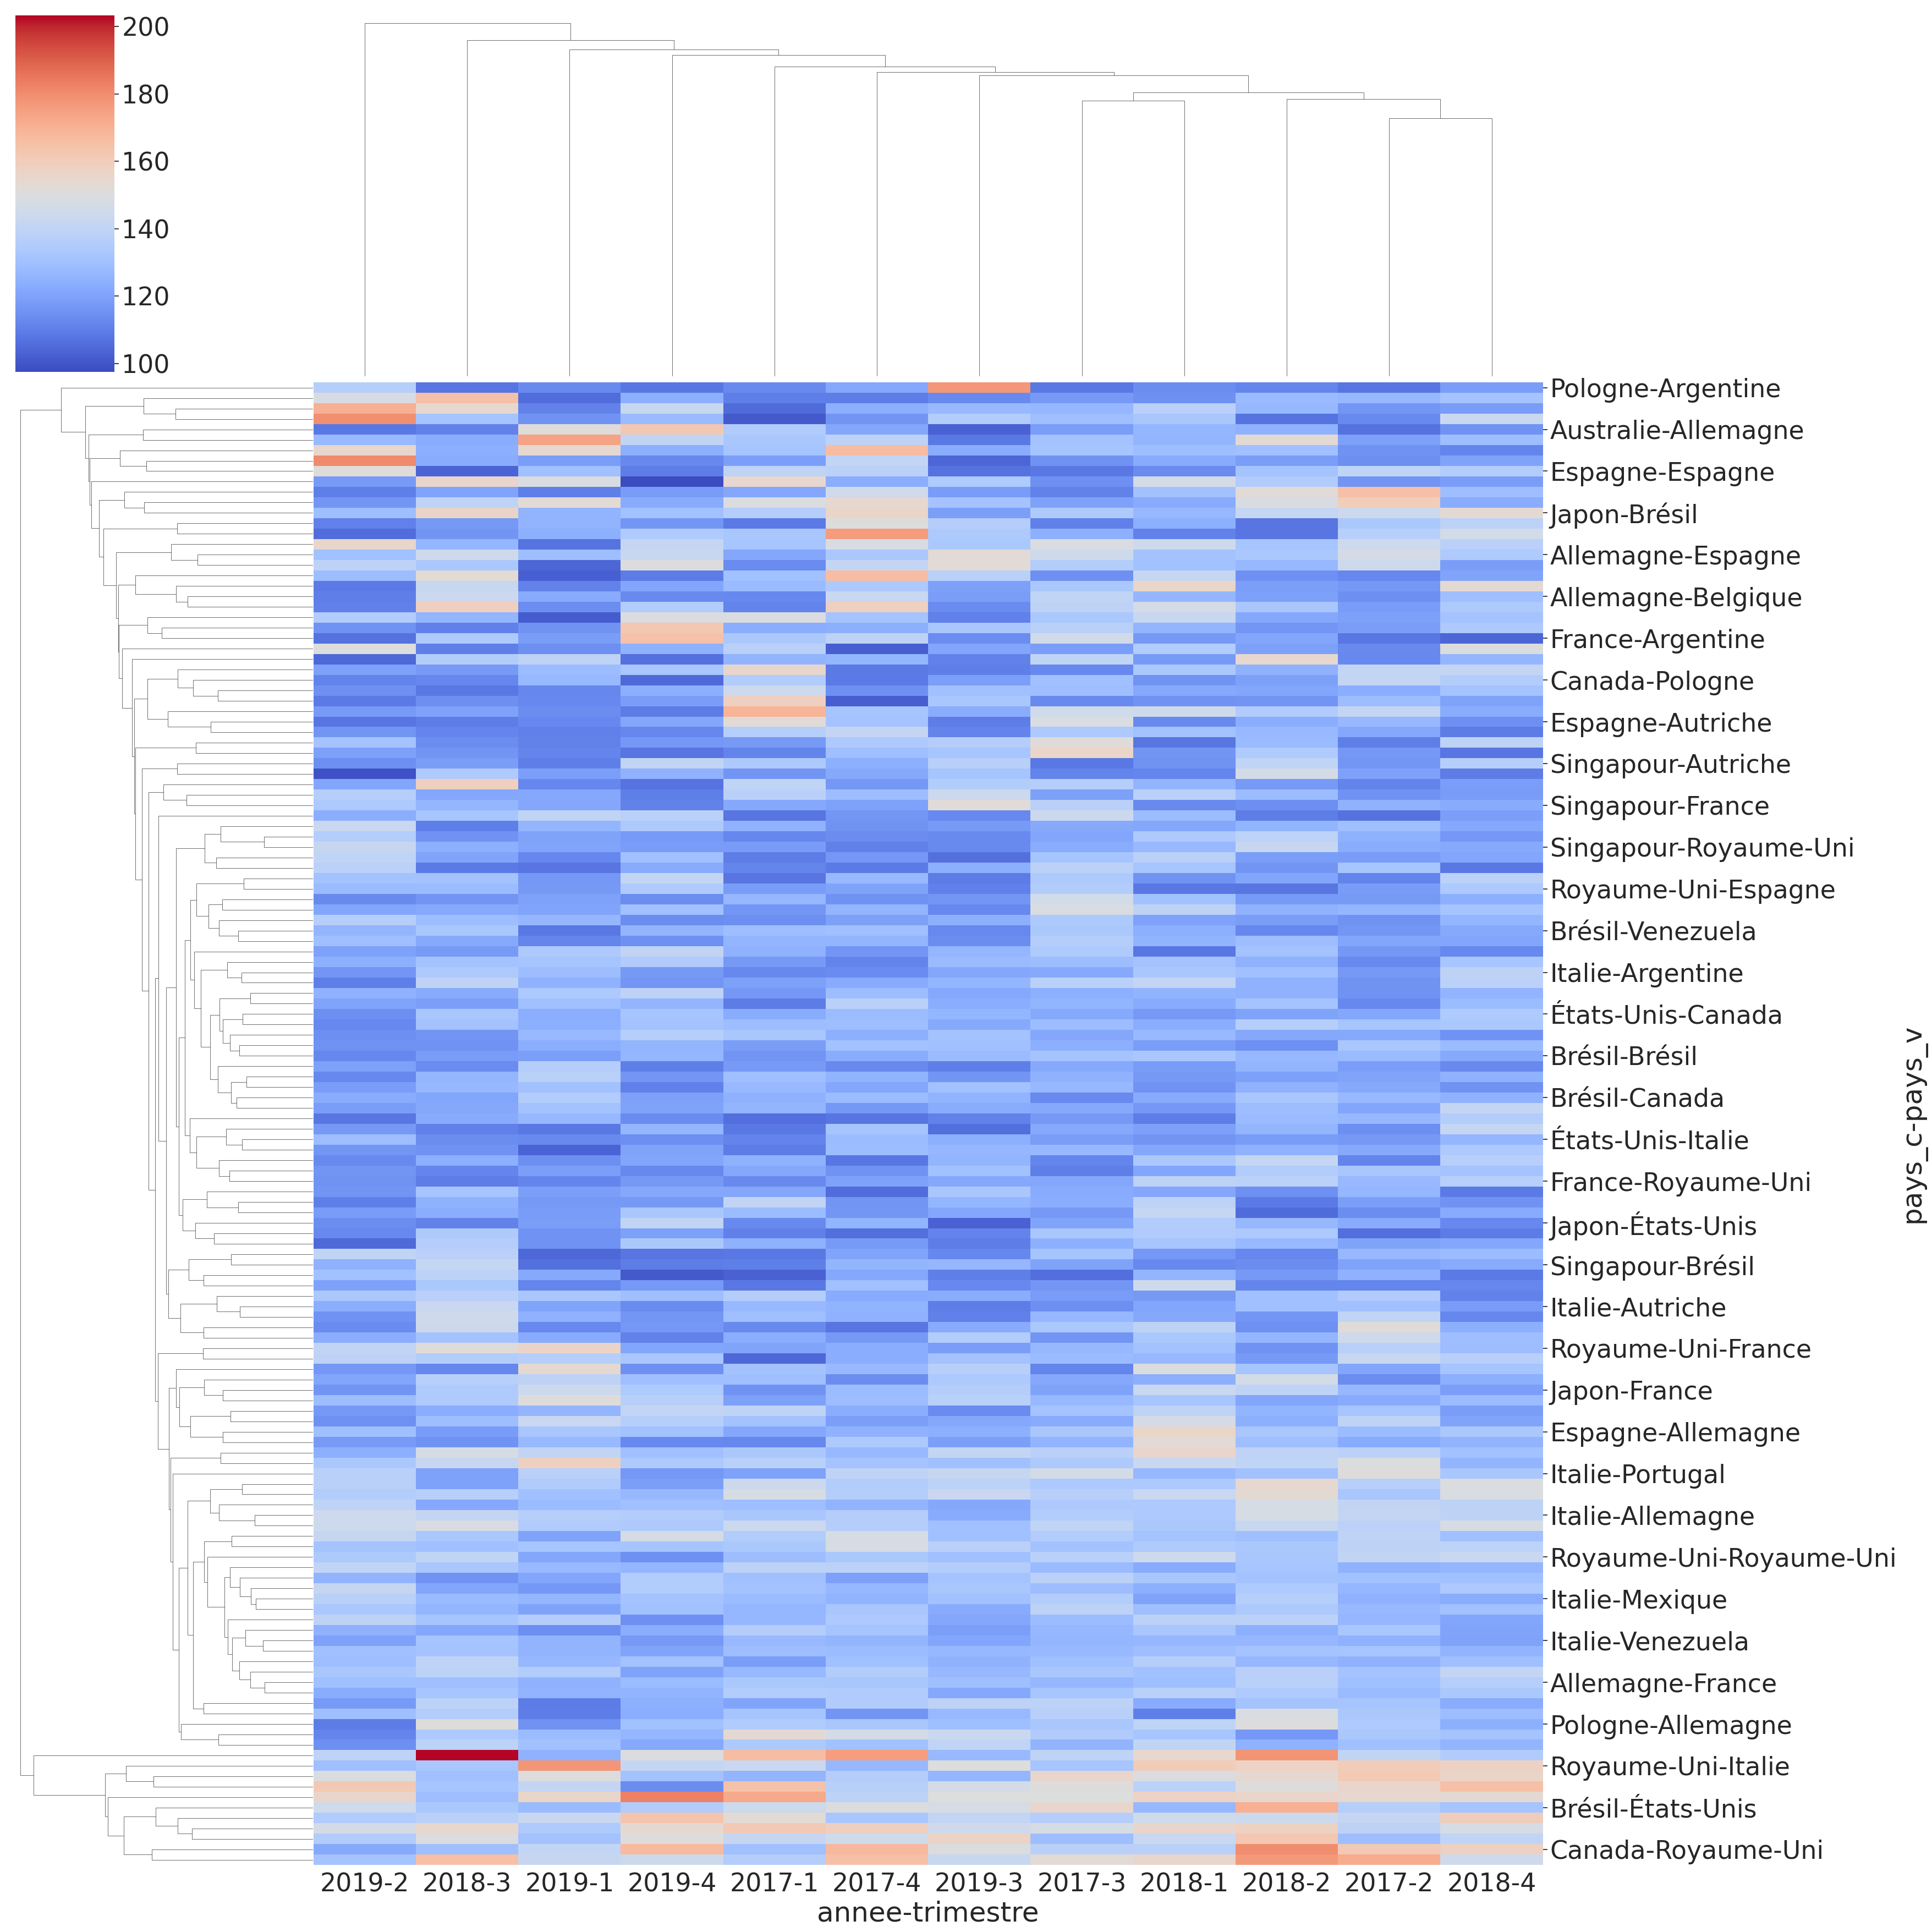

In [45]:
sns.clustermap(d01,cmap='coolwarm', figsize=(36,36));

In [48]:
d01 = donnees.pivot_table(index='pays_c',
                    columns=['annee','trimestre'], 
                    values='quantite')
print(d01.isna().sum().sum())
d01

0


annee              2017                                            2018  \
trimestre             1           2           3           4           1   
pays_c                                                                    
Allemagne    138.154747  134.279922  135.381096  135.253986  134.620017   
Argentine    118.980296  114.372781  115.535484  140.877698  122.587525   
Australie    130.855385  122.349961  122.560320  137.198286  137.901042   
Brésil       128.281982  123.268320  136.245590  128.550998  131.414821   
Canada       137.454564  140.624129  134.068152  135.758830  133.235492   
Danemark     117.241810  129.525955  119.905961  126.110000  129.840444   
Espagne      125.433869  125.542173  131.007492  126.341173  140.061155   
France       130.669120  129.678360  130.668215  132.439196  130.136032   
Italie       134.363058  134.467606  132.418233  135.817837  133.319154   
Japon        124.839523  126.953387  131.853862  134.693755  129.784949   
Pologne      126.281864  126.117539  128.640331  126.563575  133.910931   
Royaume-Uni  127.039841  133.329250  130.818517  125.016855  133.417670   
Singapour    133.631030  127.537676  127.299328  124.748228  128.731327   
États-Unis   129.308659  128.874874  131.224511  130.485558  130.644791   

annee                                                  2019              \
trimestre             2           3           4           1           2   
pays_c                                                                    
Allemagne    137.276134  134.167316  135.282660  129.373140  129.931013   
Argentine    118.562914  122.945946  119.968689  118.221649  180.594937   
Australie    145.930931  140.326153  130.690149  132.824017  127.882309   
Brésil       130.704073  128.384628  127.963144  126.968337  128.207472   
Canada       141.703287  129.855666  142.580099  130.270087  129.303897   
Danemark     123.411357  125.842723  131.366829  125.013038  114.202786   
Espagne      126.545853  116.877932  126.128051  126.598263  133.311834   
France       136.470296  135.017074  124.724193  126.181450  126.417795   
Italie       135.959449  135.743576  132.749416  130.298585  132.839715   
Japon        130.315889  132.146310  128.775247  121.060874  125.809877   
Pologne      131.611127  132.314156  126.767263  126.429570  124.313655   
Royaume-Uni  133.694683  130.315464  133.644536  137.607245  129.212250   
Singapour    131.025962  127.838513  130.006682  129.012856  135.200859   
États-Unis   133.033213  130.663327  130.642272  126.716289  128.125690   

annee                                
trimestre             3           4  
pays_c                               
Allemagne    131.600016  130.335126  
Argentine    103.918367  112.832618  
Australie    142.708800  144.375396  
Brésil       129.773796  122.534313  
Canada       135.506458  140.179108  
Danemark     122.141484  122.332518  
Espagne      117.682203  126.971187  
France       125.928655  130.270588  
Italie       128.640580  132.124057  
Japon        116.297828  127.735099  
Pologne      130.950104  126.840125  
Royaume-Uni  128.108263  126.034291  
Singapour    132.149616  139.598164  
États-Unis   128.772445  126.817428

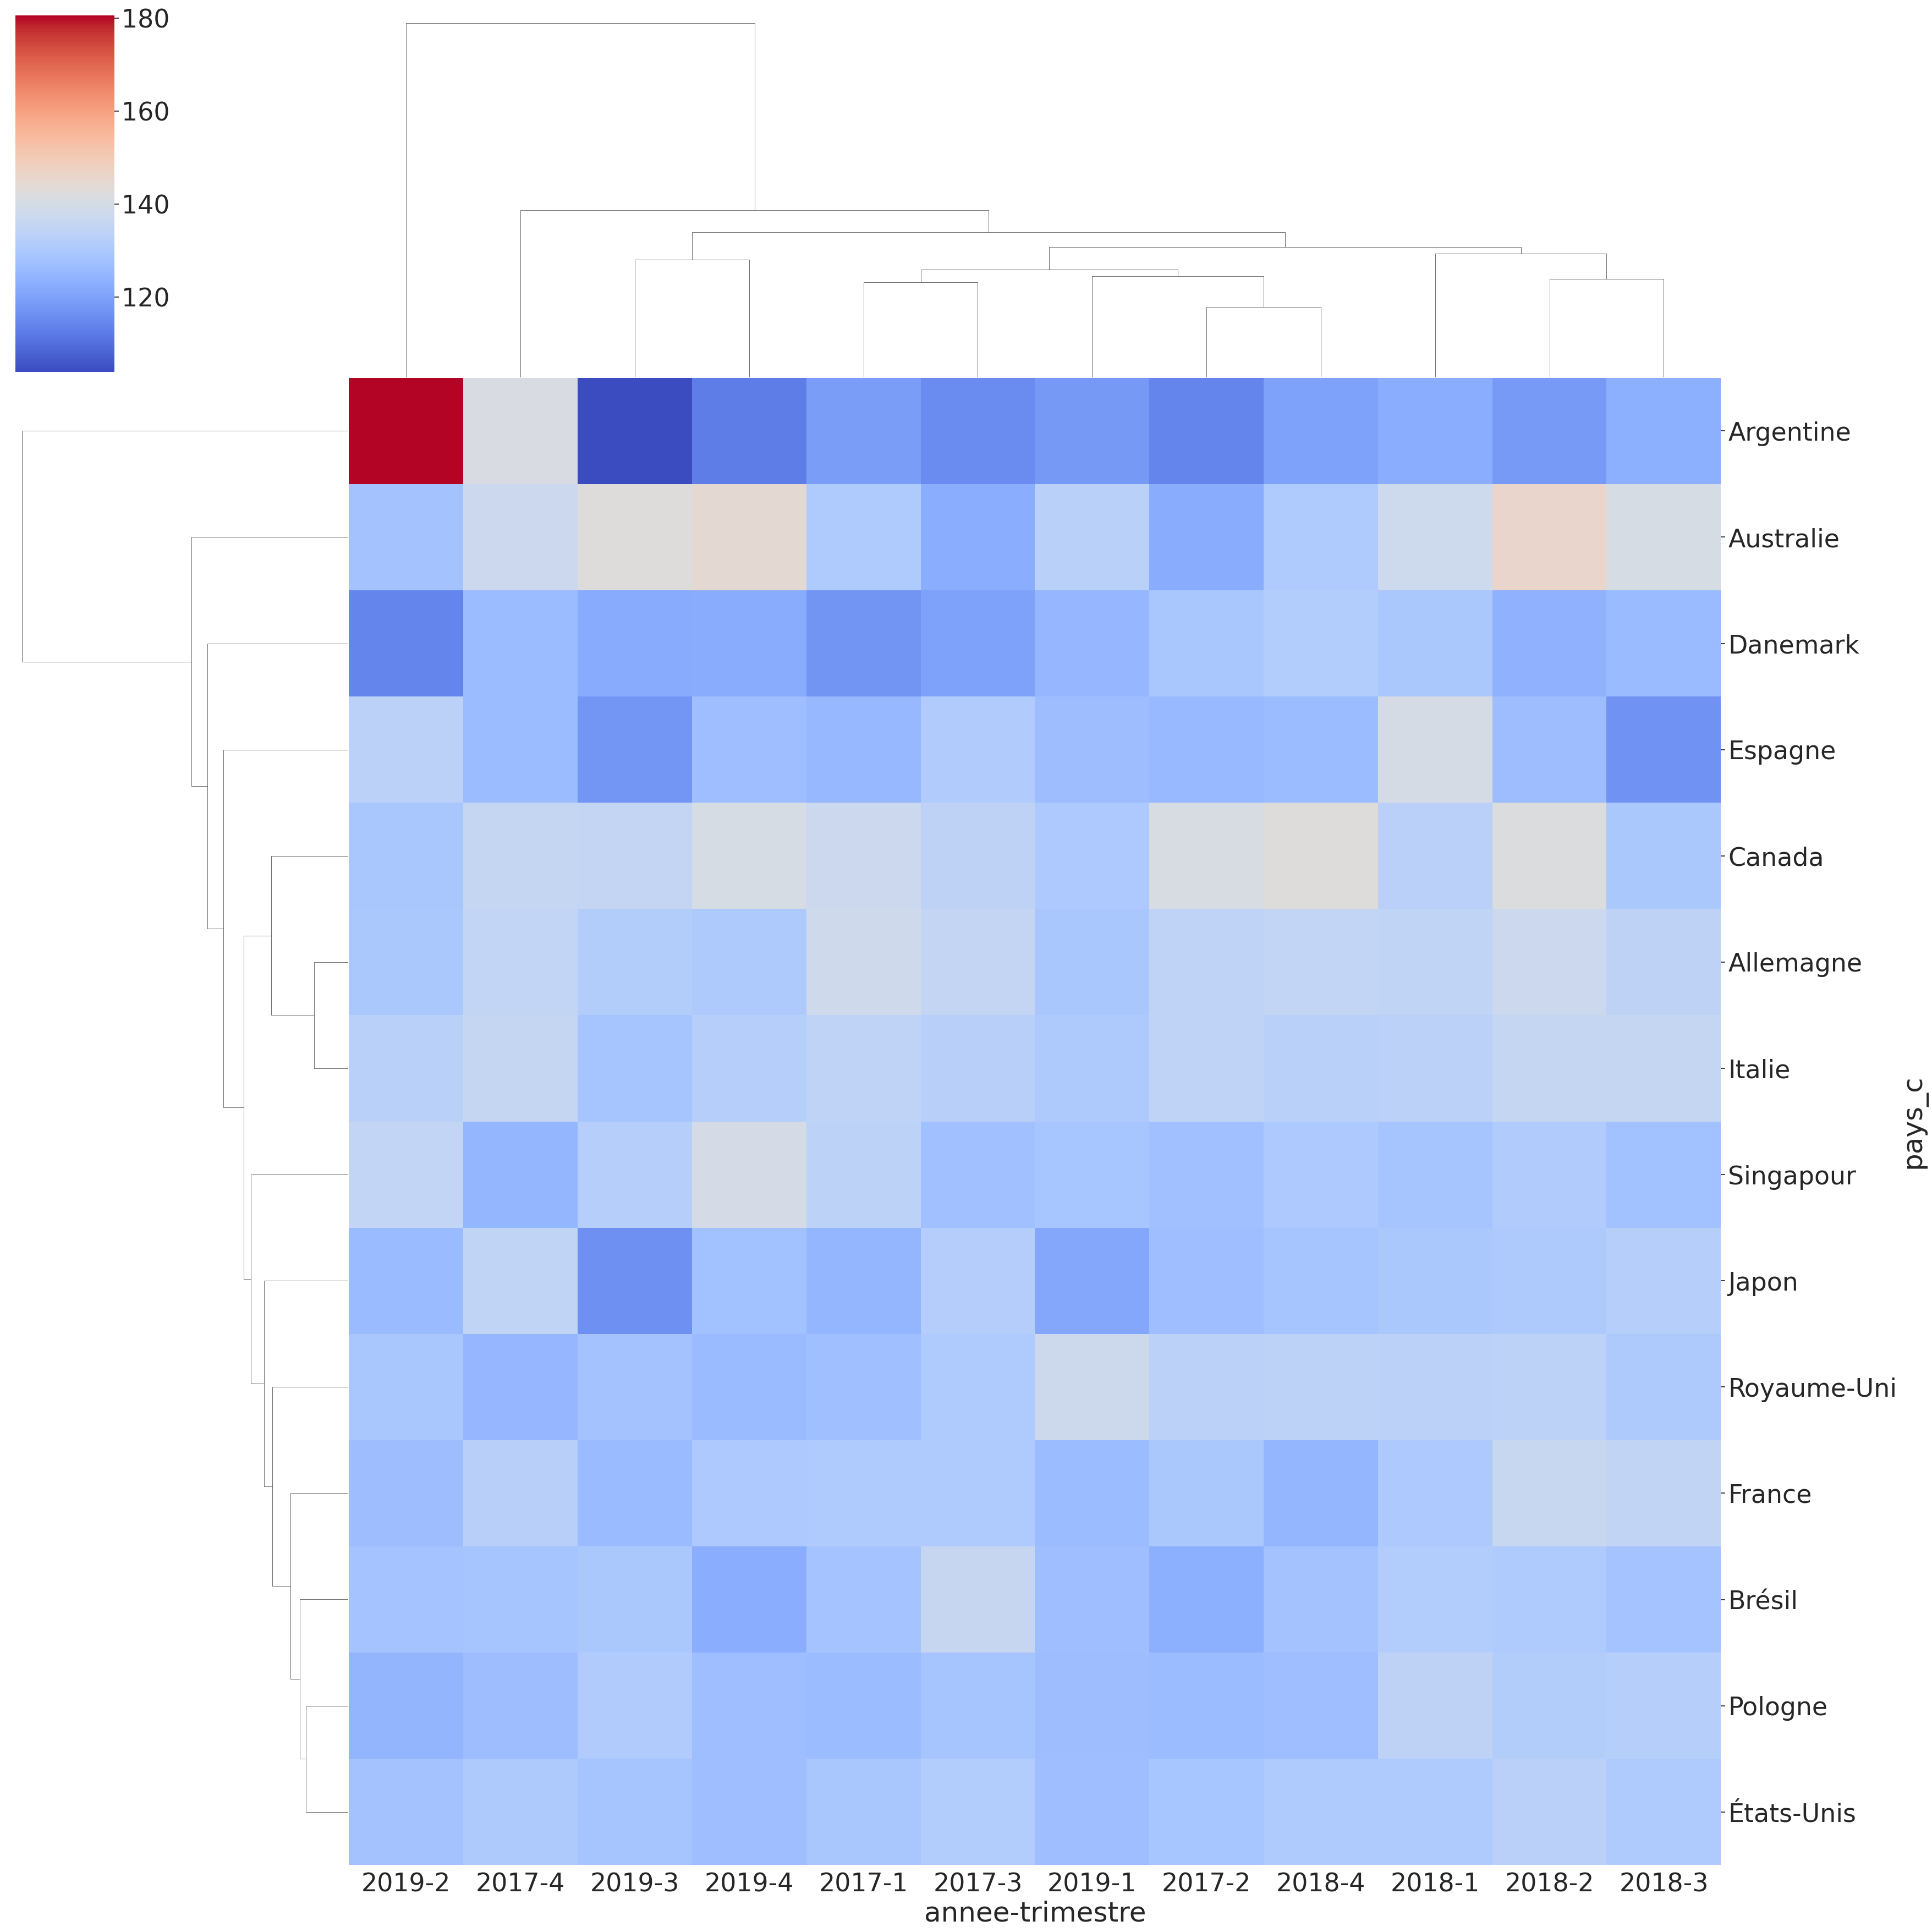

In [49]:
sns.clustermap(d01,cmap='coolwarm', figsize=(36,36));

In [50]:
from sklearn.preprocessing import StandardScaler
modelStd = StandardScaler()
modelStd.fit(d01.values)
x = modelStd.transform(d01.values)

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
model = pca.fit(x)

In [52]:
pca.explained_variance_ratio_.cumsum()*100

array([ 53.85524039,  69.40975421,  78.72510567,  84.75871072,
        90.41820829,  94.42328032,  97.65975089,  98.89375716,
        99.51564741,  99.82989873,  99.9552304 , 100.        ])

In [53]:
sum(pca.explained_variance_ratio_.cumsum()*100 <= 95) + 1

7

In [54]:
n_components = sum(pca.explained_variance_ratio_.cumsum() < .95 ) + 1 
from sklearn.decomposition import PCA
modelPCA = PCA(n_components=n_components)
modelPCA.fit(x)

PCA(n_components=7)

In [55]:
x_proj = modelPCA.transform(x)

In [56]:
x_proj.shape

(14, 7)

In [57]:
d02 = pd.DataFrame(x_proj, index=d01.index, columns=[f'Dim{i+1:02d}'for i in range(n_components)])

In [58]:
d02.head()

,Dim01,Dim02,Dim03,Dim04,Dim05,Dim06,Dim07
pays_c,,,,,,,
Allemagne,-2.331114,-0.710080,-1.195419,0.387112,0.343822,-0.099028,0.331182
Argentine,7.224641,-2.348270,-0.428417,0.384304,-0.835875,0.190687,0.308843
Australie,-2.718416,-2.216283,2.854624,0.422346,-0.334457,-0.587040,0.054483
Brésil,0.431661,0.845226,-0.120137,0.332719,1.149911,0.773102,0.220118
Canada,-3.581669,-0.700704,-1.798167,-0.021299,-1.144615,-0.576568,-0.580726


In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(d02, 'ward')

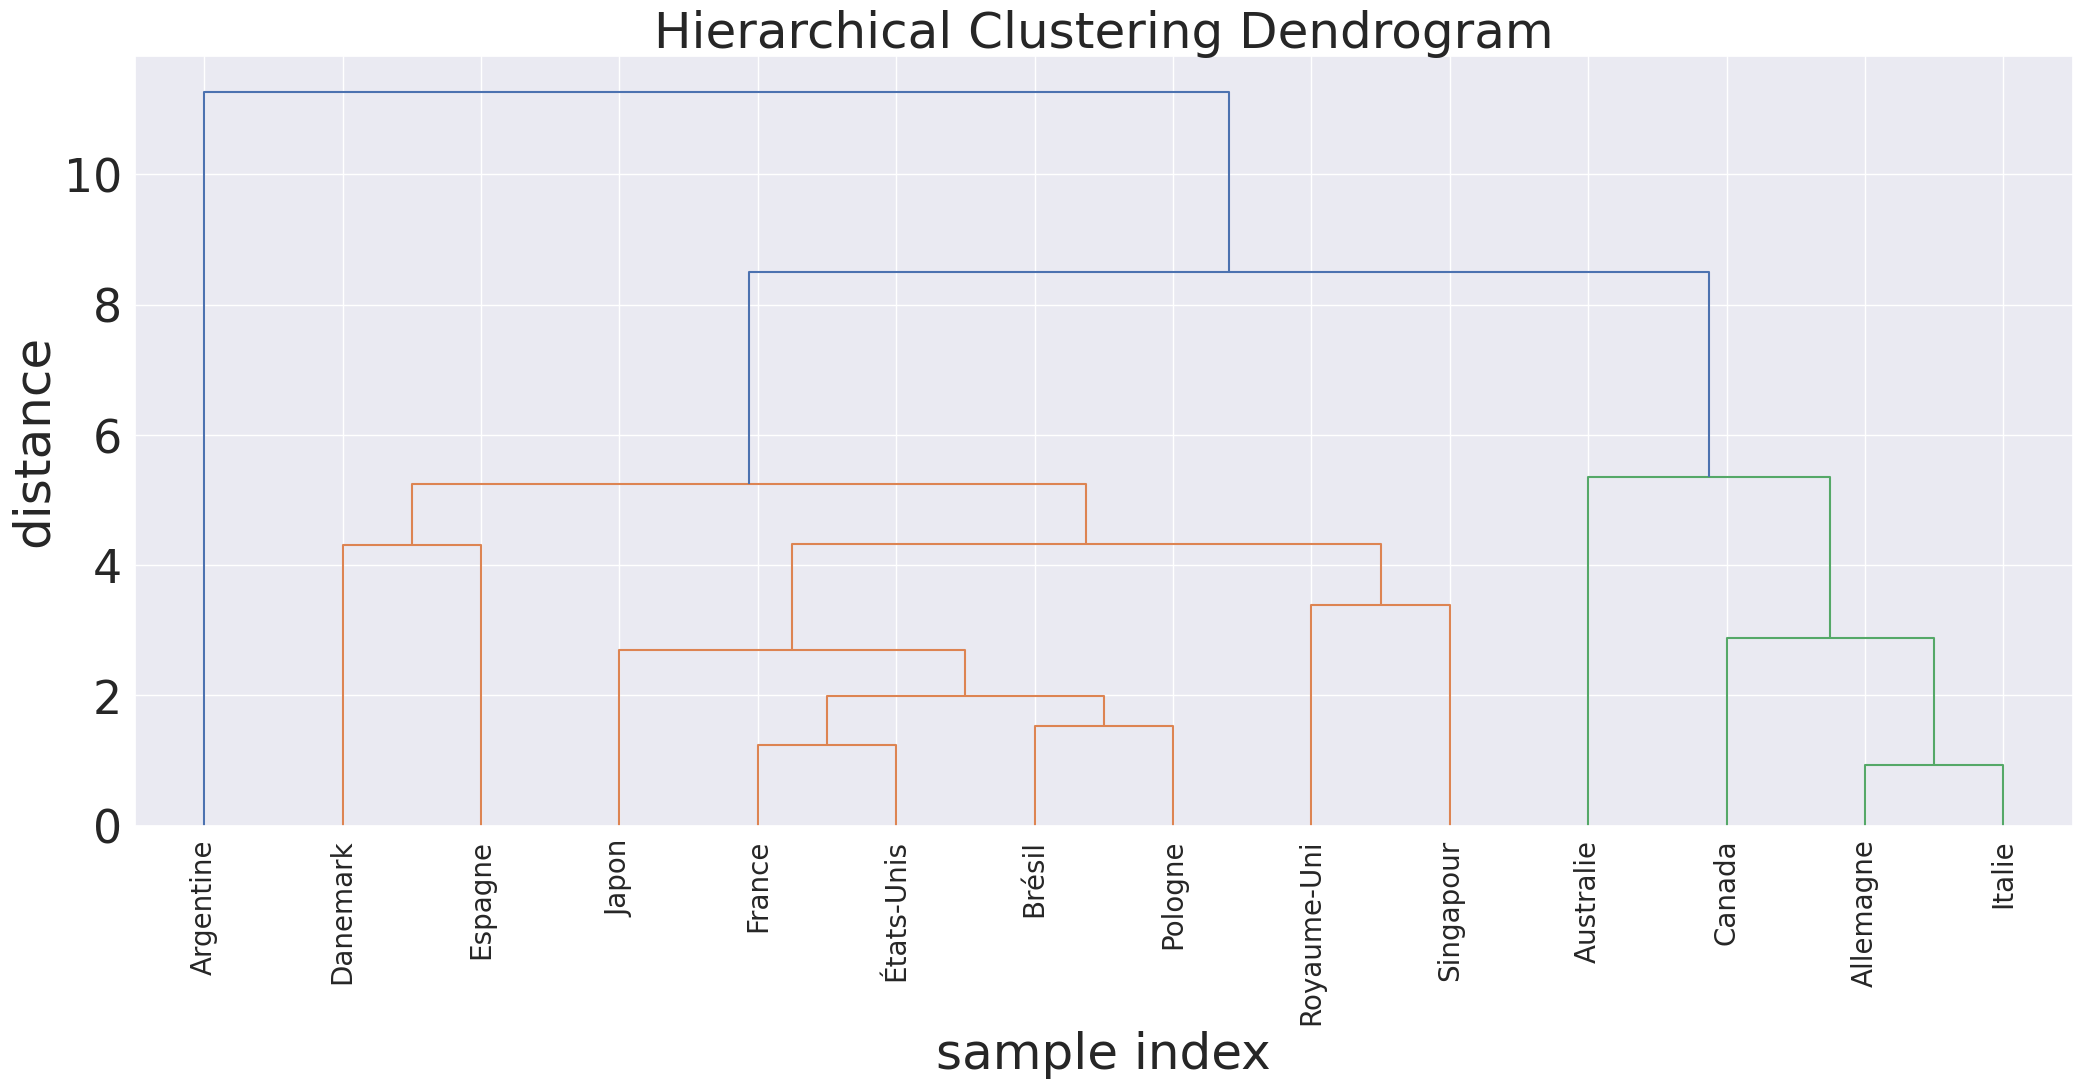

In [61]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=20.,
           labels = d02.reset_index().pays_c.values)
plt.show()

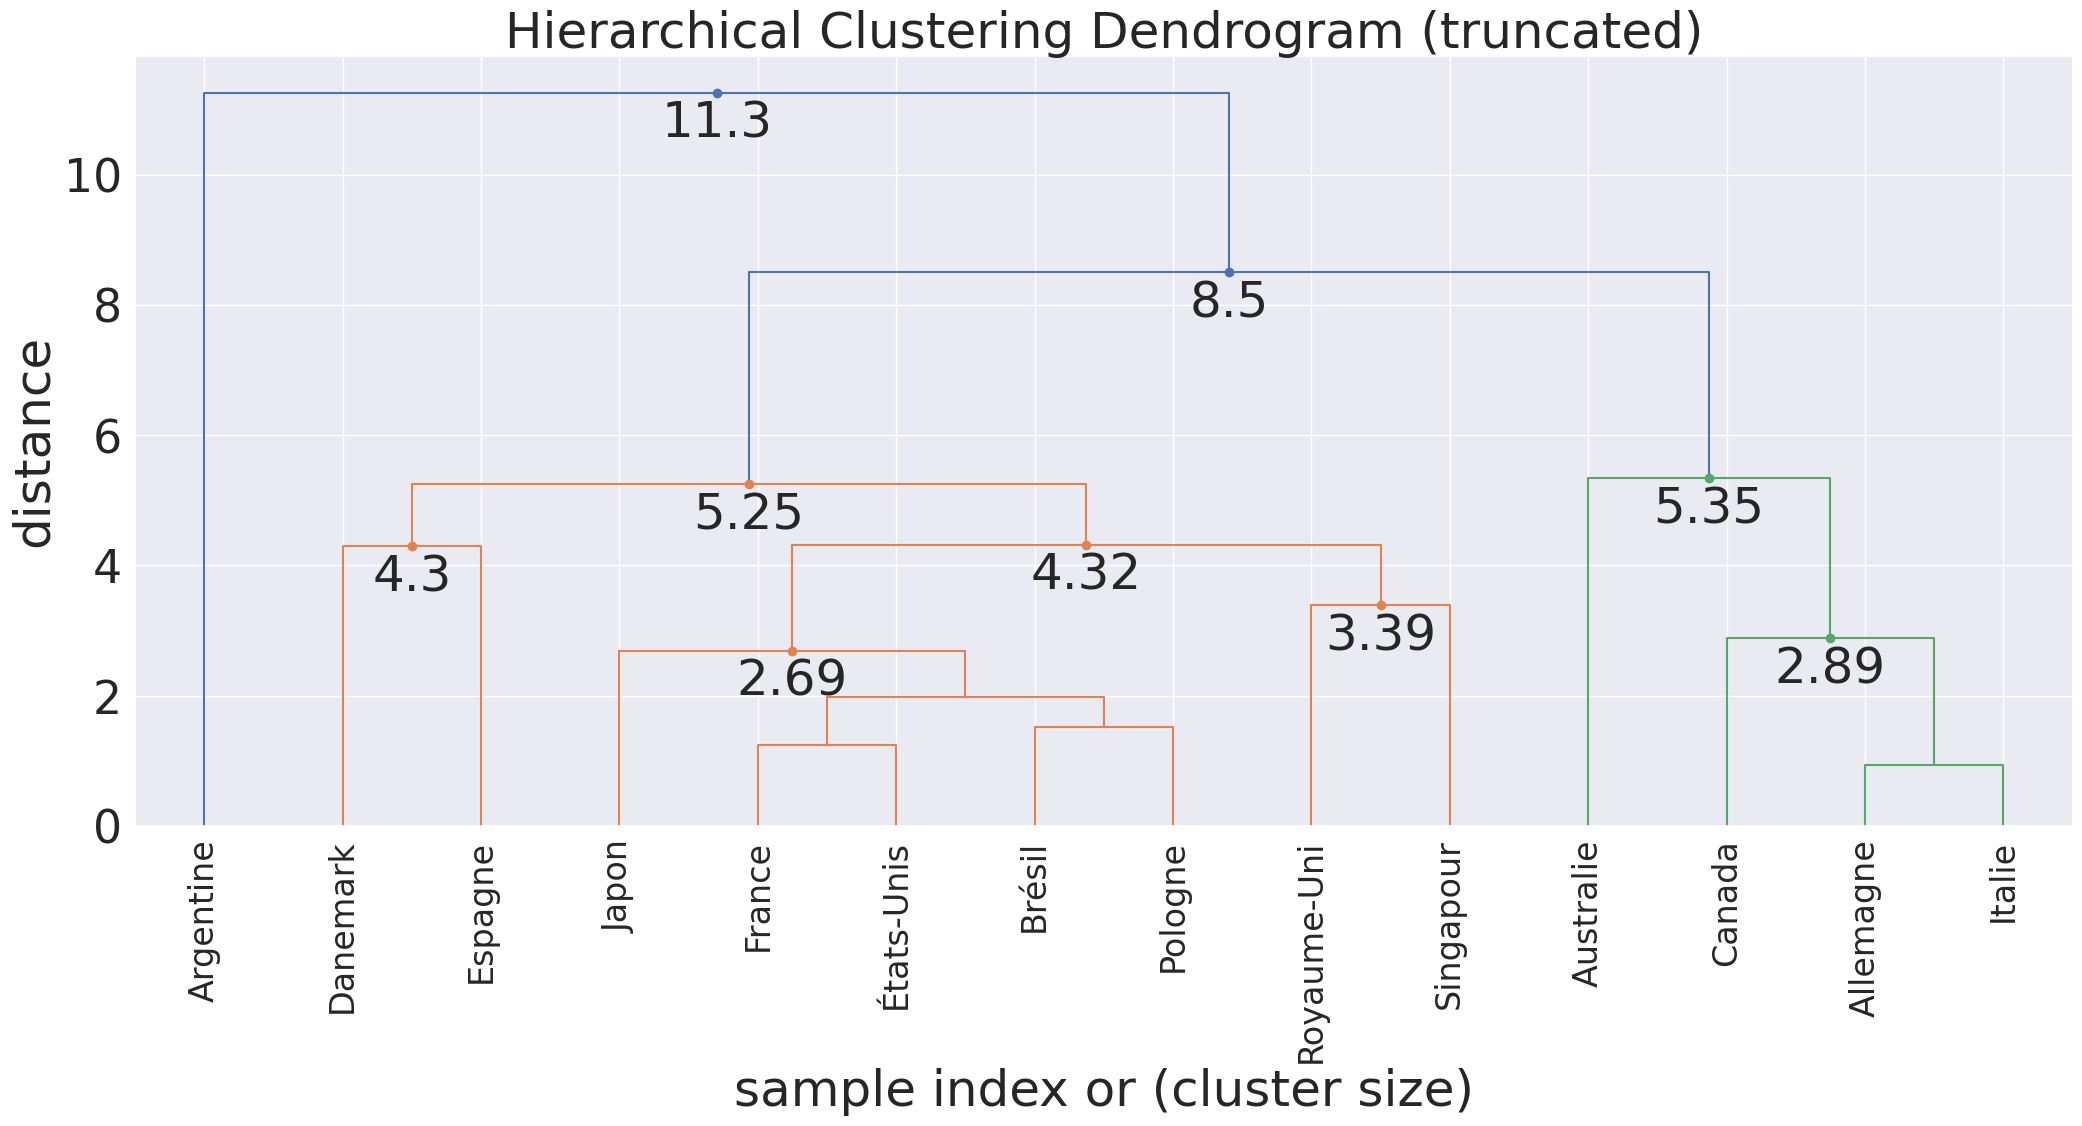

In [63]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    #p=12,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=2,  
    # max_d=26,
    labels = d02.reset_index().pays_c.values
)
plt.show()

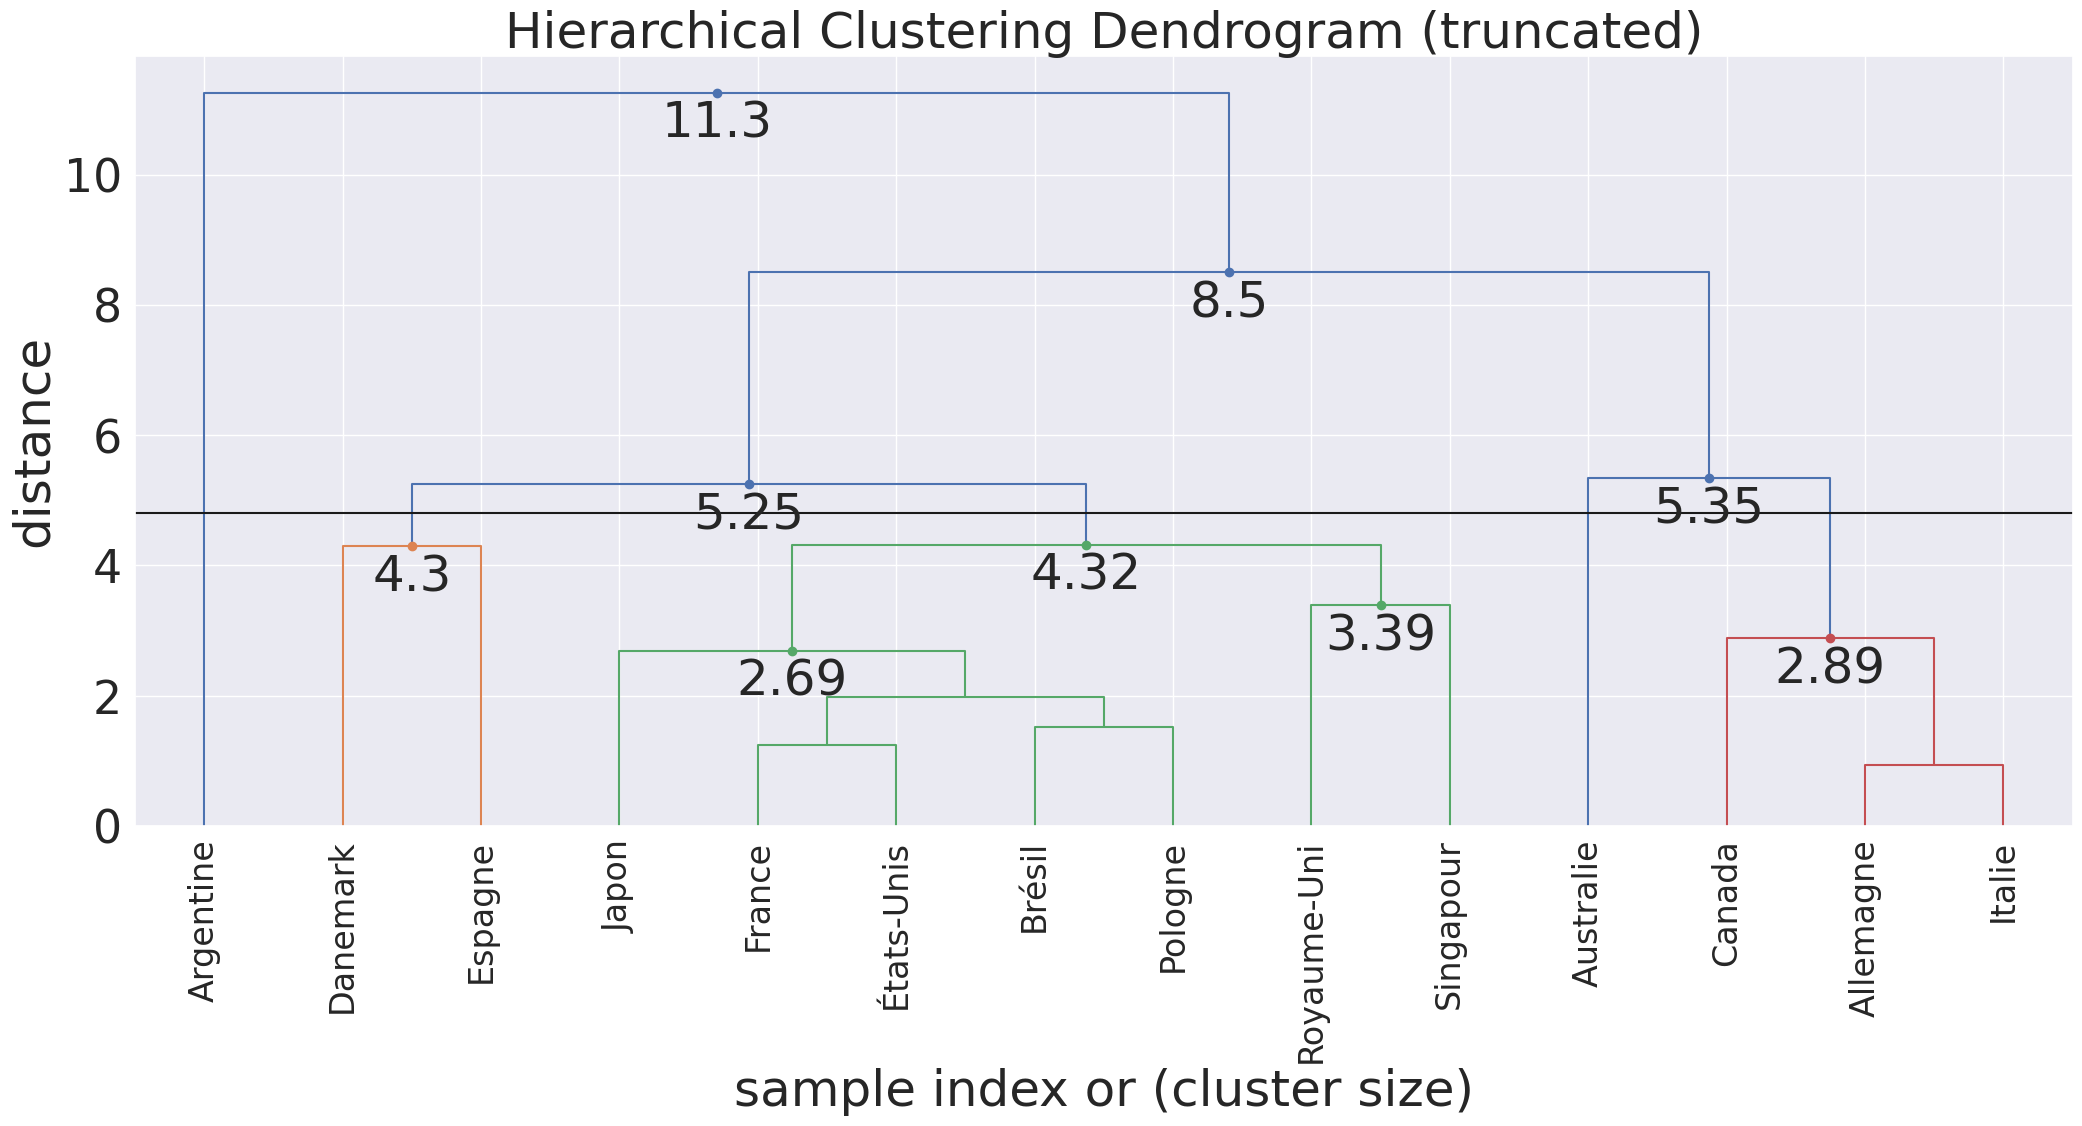

In [64]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    #p=12,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=2,  
    max_d=4.8,
    labels = d02.reset_index().pays_c.values
)
plt.show()

In [71]:
from scipy.cluster.hierarchy import fcluster
d02['Classes5']=fcluster(Z, t=5, criterion='distance')
d02['Classes3']=fcluster(Z, t=6, criterion='distance')

In [72]:
d02.reset_index()

,pays_c,Dim01,Dim02,Dim03,Dim04,Dim05,Dim06,Dim07,Classes5,Classe3,Classes3
0,Allemagne,-2.331114,-0.710080,-1.195419,0.387112,0.343822,-0.099028,0.331182,3,2,2
1,Argentine,7.224641,-2.348270,-0.428417,0.384304,-0.835875,0.190687,0.308843,5,3,3
2,Australie,-2.718416,-2.216283,2.854624,0.422346,-0.334457,-0.587040,0.054483,4,2,2
3,Brésil,0.431661,0.845226,-0.120137,0.332719,1.149911,0.773102,0.220118,2,1,1
4,Canada,-3.581669,-0.700704,-1.798167,-0.021299,-1.144615,-0.576568,-0.580726,3,2,2
5,Danemark,1.994209,1.921837,0.564692,-1.852225,-0.769679,-1.015959,-0.153397,1,1,1
6,Espagne,1.385849,2.362171,0.136931,2.296244,-0.079440,-0.809285,-0.340688,1,1,1
7,France,-0.204356,-0.677513,0.162246,-0.452521,1.127211,0.385488,-0.101812,2,1,1
8,Italie,-1.734053,-0.971165,-0.738342,0.020758,0.094265,-0.107261,0.519385,3,2,2
9,Japon,1.256216,-0.381656,-0.642410,-0.640036,1.258141,-0.783951,-0.403724,2,1,1


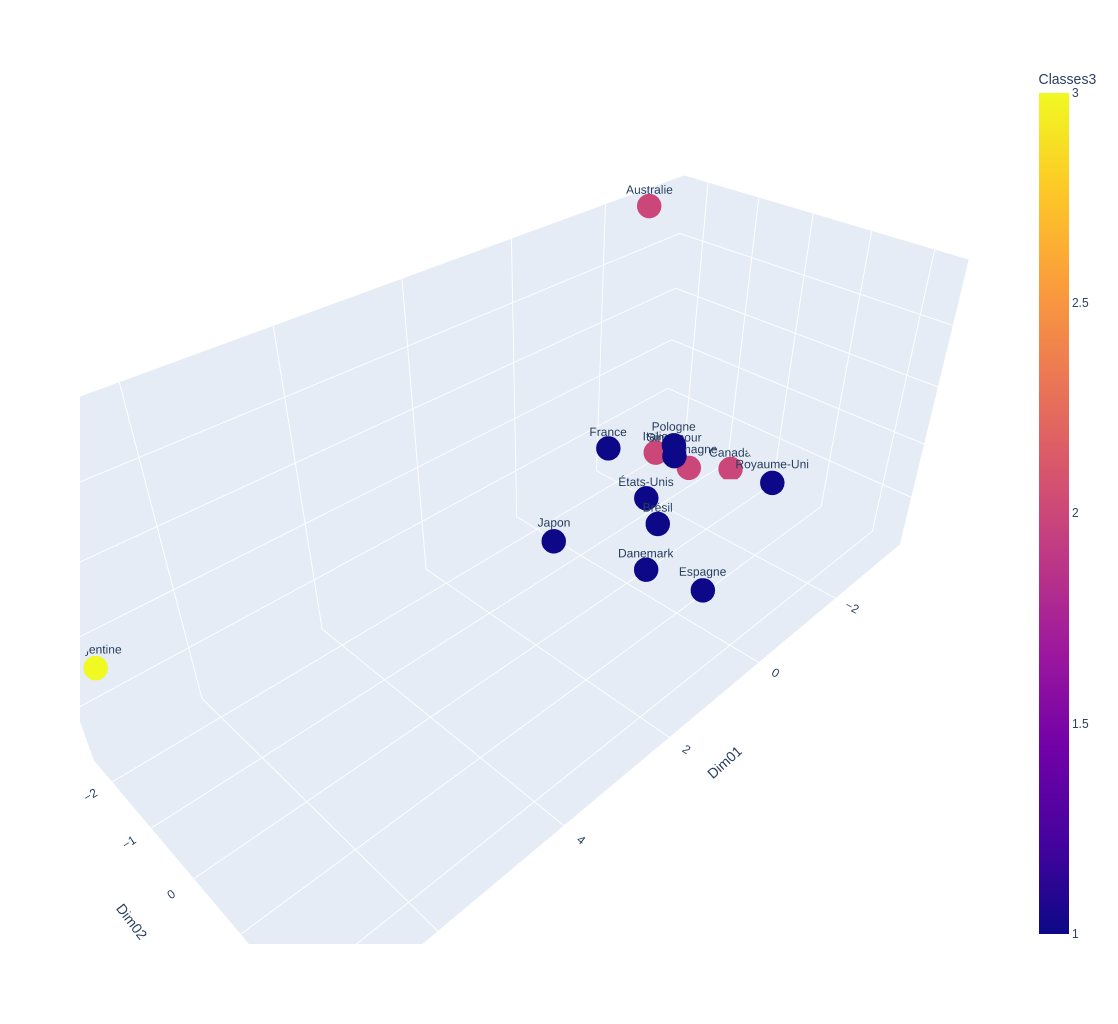

In [73]:
import plotly.express as px
fig = px.scatter_3d(d02.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    color='Classes3',
                    #size=np.abs(donnees.Eat),
                    #symbol='CD23',
                    text='pays_c', 
                    width=900,
                    height=1024,
                   )

fig.show()

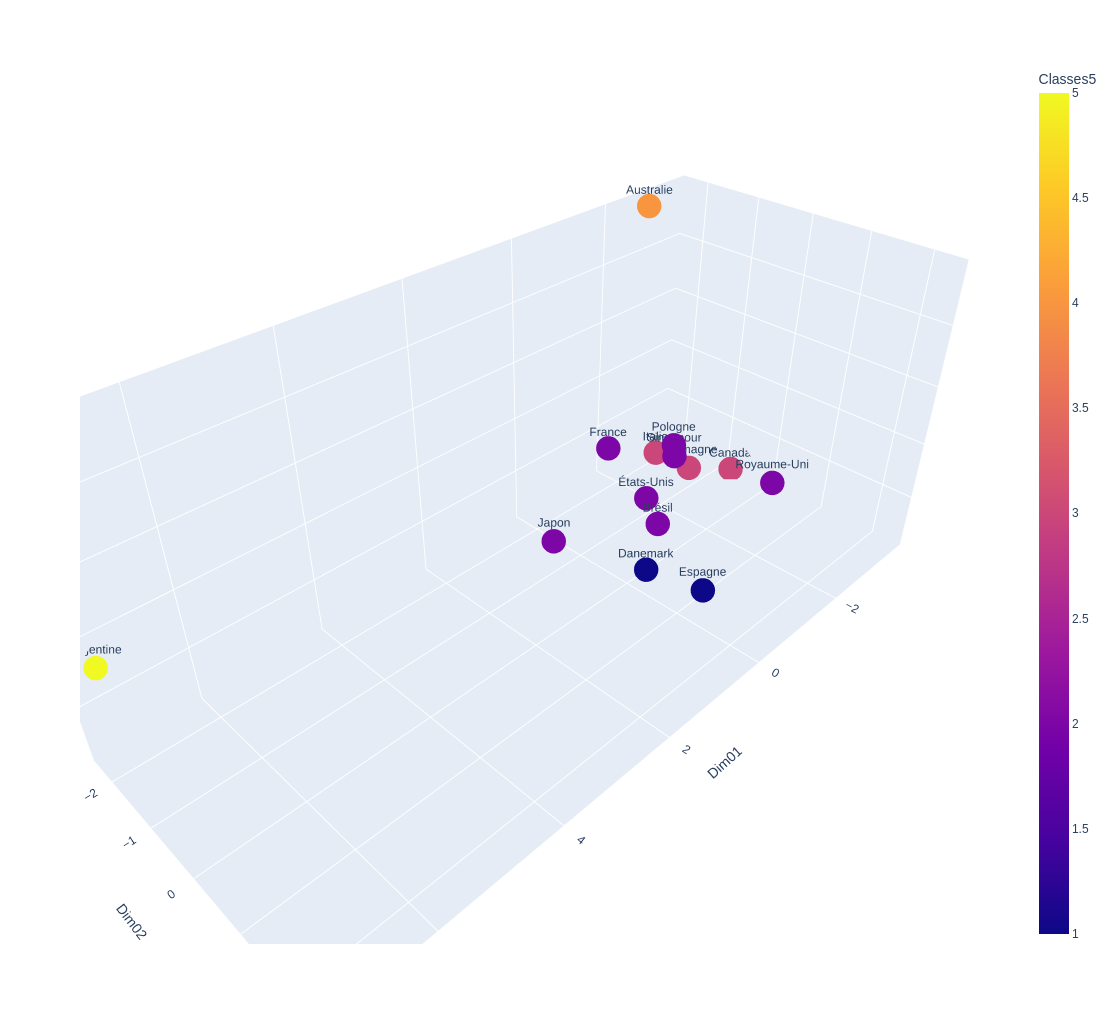

In [74]:
fig = px.scatter_3d(d02.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    color='Classes5',
                    #size=np.abs(donnees.Eat),
                    #symbol='CD23',
                    text='pays_c', 
                    width=900,
                    height=1024,
                   )

fig.show()